



# Airline on-time performance
## by Iman Hassan

## Preliminary Wrangling

This data set contain the data of 2007 and 2008. It shows the flights' arrivel and departure within USA, the aim to figure out the main reasons of the delys that occure to some flights.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the data of the years 
y_2007= pd.read_csv('2007.csv')
y_2008= pd.read_csv('2008.csv')

In [3]:
# merge the data together
frames= [y_2007, y_2008]
df_all = pd.concat(frames)
df_all.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [4]:
# descriptive statistics for numeric variables
df_all.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.446294e+07,1.446294e+07,1.446294e+07,1.446294e+07,1.416595e+07,1.446294e+07,1.413337e+07,1.446294e+07,1.446294e+07,1.413032e+07,...,1.446294e+07,1.431129e+07,1.432588e+07,1.446294e+07,1.446294e+07,8.977950e+06,8.977950e+06,8.977950e+06,8.977950e+06,8.977950e+06
mean,2.007485e+03,6.447146e+00,1.572692e+01,3.929140e+00,1.336605e+03,1.328410e+03,1.481694e+03,1.495106e+03,2.205596e+03,1.268075e+02,...,7.229955e+02,6.772907e+00,1.637350e+01,2.061697e-02,2.381535e-03,5.887385e+00,1.155427e+00,6.056198e+00,3.243747e-02,7.760701e+00
std,4.997649e-01,3.416935e+00,8.788870e+00,1.990331e+00,4.789956e+02,4.644920e+02,5.062553e+02,4.821153e+02,1.967083e+03,7.070197e+01,...,5.622162e+02,5.048903e+00,1.159649e+01,1.420982e-01,4.874283e-02,2.556749e+01,1.192239e+01,2.037779e+01,1.245532e+00,2.592753e+01
min,2.007000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.007000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.270000e+02,1.107000e+03,1.115000e+03,6.060000e+02,7.600000e+01,...,3.230000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.327000e+03,1.320000e+03,1.513000e+03,1.518000e+03,1.541000e+03,1.090000e+02,...,5.760000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.008000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.730000e+03,1.720000e+03,1.910000e+03,1.906000e+03,3.534000e+03,1.570000e+02,...,9.480000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.920000e+02,1.316000e+03


In [5]:
# see more detials about the dataset
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14462943 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay     

In [6]:
# data column number
df_all.shape

(14462943, 29)

In [7]:
# see how many unique value each column have
df_all.nunique()

Year                    2
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1440
CRSDepTime           1239
ArrTime              1440
CRSArrTime           1421
UniqueCarrier          20
FlightNum            7673
TailNum              5920
ActualElapsedTime     713
CRSElapsedTime        590
AirTime               681
ArrDelay             1355
DepDelay             1335
Origin                312
Dest                  316
Distance             1506
TaxiIn                215
TaxiOut               360
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay         1168
WeatherDelay          723
NASDelay              652
SecurityDelay         200
LateAircraftDelay     645
dtype: int64

In [8]:
# Change the column data of the weekdays names
df_all['DayOfWeek'].replace({1:'Mon',2:'Tues',3:'Wed',4:'Thur',5:'Fri',6:'Sat',7:'Sun'}, inplace= True)
# change the column data of the cancelled to yes and no
df_all['Cancelled'].replace({0:'No',1:'Yes'}, inplace= True)
# change the column data of the diverted to yes and no
df_all['Diverted'].replace({0:'No',1:'Yes'}, inplace= True)
# change the column data of the cancellation code to their meanning
df_all['CancellationCode'].replace({'A':'carrier','B':'weather','C':'NAS','D':'security'}, inplace= True)

In [9]:
df_all.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,Mon,1232.0,1225,1341.0,1340,WN,2891,...,4.0,11.0,No,NaN,No,0.0,0.0,0.0,0.0,0.0


In [10]:
#check the null values
df_all.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                296994
CRSDepTime                  0
ArrTime                329576
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 83387
ActualElapsedTime      332626
CRSElapsedTime           1838
AirTime                332626
ArrDelay               332626
DepDelay               296994
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     14164760
Diverted                    0
CarrierDelay          5484993
WeatherDelay          5484993
NASDelay              5484993
SecurityDelay         5484993
LateAircraftDelay     5484993
dtype: int64

In [11]:
# putting the main features in new data set
df= df_all[['Year','Month','DayofMonth','DayOfWeek','UniqueCarrier','ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
df.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,Mon,WN,1.0,7.0,SMF,ONT,389,No,NaN,No,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,Mon,WN,8.0,13.0,SMF,PDX,479,No,NaN,No,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,Mon,WN,34.0,36.0,SMF,PDX,479,No,NaN,No,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,Mon,WN,26.0,30.0,SMF,PDX,479,No,NaN,No,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,Mon,WN,-3.0,1.0,SMF,PDX,479,No,NaN,No,0.0,0.0,0.0,0.0,0.0


In [12]:
# see how many null values.
df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
ArrDelay               332626
DepDelay               296994
Origin                      0
Dest                        0
Distance                    0
Cancelled                   0
CancellationCode     14164760
Diverted                    0
CarrierDelay          5484993
WeatherDelay          5484993
NASDelay              5484993
SecurityDelay         5484993
LateAircraftDelay     5484993
dtype: int64

The majorty of null values are at cancelation code which can be ignored by relaing to the minutes delays at each code.

In [13]:
# Create new colums that shows the status of the delays.
df['ArrDelay_status']= pd.cut(df.ArrDelay, bins=[-500,0,15,60,1000], labels=['Early arrive','slightly delayed','delayed','highly delayed'])
df['DepDelay_status']= pd.cut(df.DepDelay, bins=[-500,0,15,60,1000], labels=['Early Departure','slightly delayed','delayed','highly delayed'])

df.head()

<ipython-input-13-622be063e63a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ArrDelay_status']= pd.cut(df.ArrDelay, bins=[-500,0,15,60,1000], labels=['Early arrive','slightly delayed','delayed','highly delayed'])
<ipython-input-13-622be063e63a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DepDelay_status']= pd.cut(df.DepDelay, bins=[-500,0,15,60,1000], labels=['Early Departure','slightly delayed','delayed','highly delayed'])


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_status,DepDelay_status
0,2007,1,1,Mon,WN,1.0,7.0,SMF,ONT,389,No,NaN,No,0.0,0.0,0.0,0.0,0.0,slightly delayed,slightly delayed
1,2007,1,1,Mon,WN,8.0,13.0,SMF,PDX,479,No,NaN,No,0.0,0.0,0.0,0.0,0.0,slightly delayed,slightly delayed
2,2007,1,1,Mon,WN,34.0,36.0,SMF,PDX,479,No,NaN,No,3.0,0.0,0.0,0.0,31.0,delayed,delayed
3,2007,1,1,Mon,WN,26.0,30.0,SMF,PDX,479,No,NaN,No,23.0,0.0,0.0,0.0,3.0,delayed,delayed
4,2007,1,1,Mon,WN,-3.0,1.0,SMF,PDX,479,No,NaN,No,0.0,0.0,0.0,0.0,0.0,Early arrive,slightly delayed


In [14]:
year_group= df.groupby('Year')
year_group[['ArrDelay','DepDelay','CarrierDelay','LateAircraftDelay','Year']].head()

,ArrDelay,DepDelay,CarrierDelay,LateAircraftDelay,Year
0,1.0,7.0,0.0,0.0,2007
1,8.0,13.0,0.0,0.0,2007
2,34.0,36.0,3.0,31.0,2007
3,26.0,30.0,23.0,3.0,2007
4,-3.0,1.0,0.0,0.0,2007
0,-14.0,8.0,NaN,NaN,2008
1,2.0,19.0,NaN,NaN,2008
2,14.0,8.0,NaN,NaN,2008
3,-6.0,-4.0,NaN,NaN,2008
4,34.0,34.0,2.0,32.0,2008


In [20]:
#find out the top 5 Origin airport code. 
most_5_Origin= df["Origin"].value_counts().nlargest(n=5)
most_5_Origin

ATL    828364
ORD    726164
DFW    578626
DEN    482371
LAX    453205
Name: Origin, dtype: int64

In [16]:
# Create data set for the 5 Top Origin airport code
most_5_origin_1= df.query('Origin == "ATL"')
most_5_origin_2= df.query('Origin == "ORD"')
most_5_origin_3= df.query('Origin == "DFW"')
most_5_origin_4= df.query('Origin == "DEN"')
most_5_origin_5= df.query('Origin == "LAX"')

frames= [most_5_origin_1, most_5_origin_2,most_5_origin_3,most_5_origin_4,most_5_origin_5]
most_5_origin = pd.concat(frames)
most_5_origin.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_status,DepDelay_status
93689,2007,1,19,Fri,XE,23.0,24.0,ATL,IAH,689,No,NaN,No,5.0,0.0,0.0,0.0,18.0,delayed,delayed
93810,2007,1,31,Wed,XE,-3.0,-7.0,ATL,CLE,554,No,NaN,No,0.0,0.0,0.0,0.0,0.0,Early arrive,Early Departure
93852,2007,1,19,Fri,XE,3.0,-3.0,ATL,CLE,554,No,NaN,No,0.0,0.0,0.0,0.0,0.0,slightly delayed,Early Departure
94072,2007,1,15,Mon,XE,-4.0,-4.0,ATL,IAH,689,No,NaN,No,0.0,0.0,0.0,0.0,0.0,Early arrive,Early Departure
94113,2007,1,19,Fri,XE,-12.0,-10.0,ATL,CLE,554,No,NaN,No,0.0,0.0,0.0,0.0,0.0,Early arrive,Early Departure


In [17]:
#find out the top 5 Destination airport code. 
most_5_Dest= df["Dest"].value_counts().nlargest(n=5)
most_5_Dest

ATL    828326
ORD    726168
DFW    578882
DEN    482228
LAX    453361
Name: Dest, dtype: int64

In [18]:
# Create data set for the 5 Top Destination airport code
most_5_dest_1= df.query('Dest == "ATL"')
most_5_dest_2= df.query('Dest == "ORD"')
most_5_dest_3= df.query('Dest == "DFW"')
most_5_dest_4= df.query('Dest == "DEN"')
most_5_dest_5= df.query('Dest == "LAX"')

frames_D= [most_5_dest_1, most_5_dest_2,most_5_dest_3,most_5_dest_4,most_5_dest_5]
most_5_dest = pd.concat(frames_D)
most_5_dest.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_status,DepDelay_status
93831,2007,1,26,Fri,XE,2.0,-4.0,CLE,ATL,554,No,NaN,No,0.0,0.0,0.0,0.0,0.0,slightly delayed,Early Departure
93879,2007,1,6,Sat,XE,0.0,0.0,EWR,ATL,745,No,NaN,No,0.0,0.0,0.0,0.0,0.0,Early arrive,Early Departure
93893,2007,1,8,Mon,XE,-5.0,-1.0,CLE,ATL,554,No,NaN,No,0.0,0.0,0.0,0.0,0.0,Early arrive,Early Departure
94014,2007,1,2,Tues,XE,35.0,9.0,CLE,ATL,554,No,NaN,No,9.0,0.0,26.0,0.0,0.0,delayed,slightly delayed
94475,2007,1,19,Fri,XE,38.0,52.0,CLE,ATL,554,No,NaN,No,0.0,0.0,0.0,0.0,38.0,delayed,delayed


### What is the structure of your dataset?

the data contian 14,462,943 rows , the data have 17 features (Year, Month, DayofMonth, UniqueCarrier, DayofWeek, ArrDelay, DepDelay, orgin, Dest, Cancelled, CancellationCode, Diverted, NASDelay, CarrierDelay, LateAircraftDelay, WeatherDelay,SecurityDelay). The data contian numirical and categorical variables.

UniqueCarrier: 'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
           'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
           'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
           'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
           'HA: Hawaiian Airlines','AQ: Aloha Airlines'


ArrDelay_status: when delay is less than 0 minutes so that be = Early_Arrival , when delay is between 0 and 15 minutes slightly delayed , when delay is between 15 and 60 minutes delayed, when it is more than 60 minutes highly delayed.


DepDelay_status: when delay is less than 0 minutes so that be = Early_Departure , when delay is between 0 and 15 minutes slightly delayed , when delay is between 15 and 60 minutes delayed, when it is more than 60 minutes highly delayed.

LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


### What is/are the main feature(s) of interest in your dataset?

by looking through data i think the main features are those variables that shows the reason of delays and what are the main orgian and destination that delays and cancelletion occurs the most. In addition looking for the differance between 2007 and 2008 in all variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that maybe some days of the week have more delays and cancellation happend.In addtion,the average mintues of reason of delays will show some insights.

## Univariate Exploration

In this section, first ,I will look at the bar chart of Day of week counts.

Text(0, 0.5, 'Day of Week')

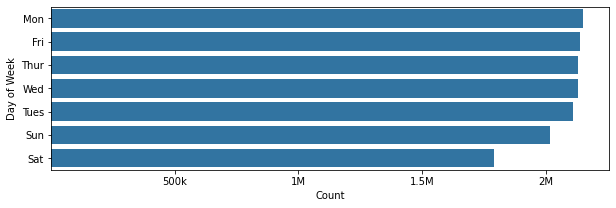

In [21]:
#create bar chart for day of the week
#set the base color.
base_color = sb.color_palette()[0]
DayofWeek_counts= df['DayOfWeek'].value_counts()

# set the max value for all counts of days
max_DayofWeek_counts= DayofWeek_counts[0]
Counts= df['DayOfWeek'].value_counts().sum()
freq= DayofWeek_counts.index


sb.set_context(rc = {'patch.linewidth': 0.0})
fig = plt.subplots(figsize=(10,3))
# set all variables into the bar chart
sb.countplot( data= df, y= 'DayOfWeek', color=base_color, order=freq);
plt.xticks([0.5e6, 1.0e6, 1.5e6, 2.0e6], [ '500k', '1M', '1.5M', '2M']);

plt.xlabel('Count')
plt.ylabel('Day of Week')


We can see that Saturday is taken the lowest number of flights around 850K followed by Sunday less than 1M as they are the weekend days the number of flights are less.

7     1276491
8     1265558
3     1255299
6     1237945
5     1237902
1     1227324
4     1212774
10    1186197
12    1159097
9     1141095
2     1134840
11    1128421
Name: Month, dtype: int64


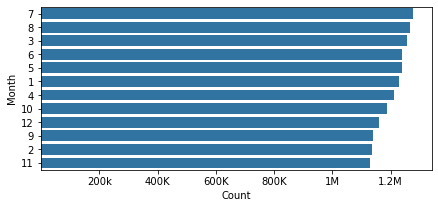

In [22]:
#set the base color.
base_color = sb.color_palette()[0]
Month_counts= df['Month'].value_counts()

# set the max value for all counts of days
max_Month_counts= DayofWeek_counts[0]
Counts_Month= df['Month'].value_counts().sum()
freq_Month= Month_counts.index


sb.set_context(rc = {'patch.linewidth': 0.0})
fig = plt.subplots(figsize=(7,3))
# set all variables into the bar chart
sb.countplot( data= df, y= 'Month', color=base_color, order= freq_Month);
plt.xticks([0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6,1.2e6], [ '200k', '400K', '600K', '800K','1M','1.2M']);

plt.xlabel('Count')
plt.ylabel('Month')
print(Month_counts)

The highest month in term of number of flights is July with around 1.27M flights followed by Augest then.

Text(0, 0.5, 'Unique carrier')

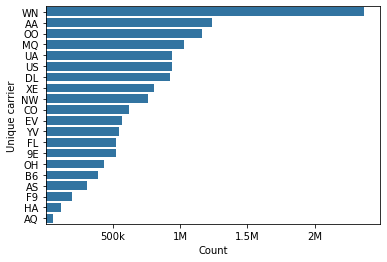

In [23]:
# unique carrier bar chart
Counts_Carrier= df['UniqueCarrier'].value_counts()
freq_carr= Counts_Carrier.index
sb.countplot( data= df, y= 'UniqueCarrier', color=base_color, order= freq_carr);
plt.xticks([0.5e6, 1.0e6, 1.5e6, 2.0e6], [ '500k', '1M', '1.5M', '2M']);

plt.xlabel('Count')
plt.ylabel('Unique carrier')


The highest airline operator is WN: Southwest Airlines followed by AA: American Airlines but the differance is more than million.

No     14164761
Yes      298182
Name: Cancelled, dtype: int64


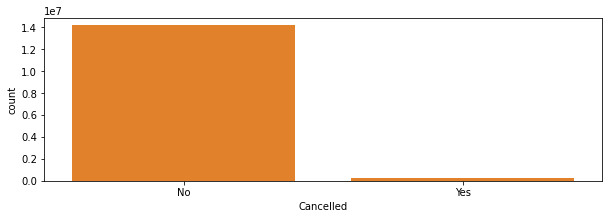

In [24]:
# bar chart for number of Cancelled flights
base_color_1 = sb.color_palette()[1]

cancelled_count_total= df['Cancelled'].value_counts().sum()
cancelled_count= df['Cancelled'].value_counts()
cancelled_count_index= cancelled_count.index

sb.set_context(rc = {'patch.linewidth': 0.0})
fig = plt.subplots(figsize=(10,3))

sb.countplot(data=df, x='Cancelled', color=base_color_1);
#plt.yticks([1e6, 2e6, 3e6, 4e6, 5e6,6e6, 7e6], [ '1M', '2M', '3M', '4M', '5M','6M','7M']);
print(cancelled_count)


Majorty of the flights are not cancelled but there is less than 298K which are cancelled flights.

No     14428499
Yes       34444
Name: Diverted, dtype: int64


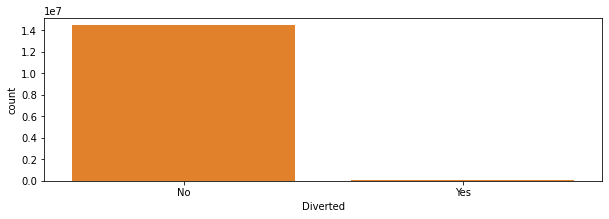

In [25]:
# bar chart for number of Diverted flights
Diverted_count_total= df['Diverted'].value_counts().sum()
Diverted_count= df['Diverted'].value_counts()

sb.set_context(rc = {'patch.linewidth': 0.0})
fig = plt.subplots(figsize=(10,3))

sb.countplot(data=df, x='Diverted', color=base_color_1);
#plt.yticks([1e6, 2e6, 3e6, 4e6, 5e6,6e6, 7e6], [ '1M', '2M', '3M', '4M', '5M','6M','7M']);
print(Diverted_count)

Around 34k are diverted flights which are more less than cancelled flights.

Text(0.5, 0, 'Origin')

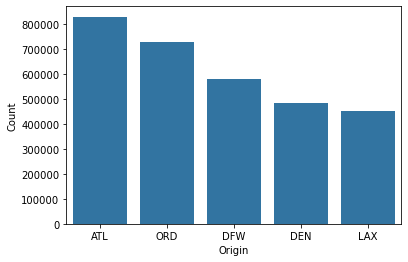

In [27]:
# Top 5 Origin airport code 
Counts_Origin= most_5_origin['Origin'].value_counts()
freq_origin= Counts_Origin.index
sb.countplot( data= most_5_origin, x= 'Origin', color=base_color, order= freq_origin)

plt.ylabel('Count')
plt.xlabel('Origin')


ATL: Hartsfield Jackson Atlanta International Airport is the highest airport origin for all the data with more than 800K flights over the two years, followed by ORD: Chicago O'Hare International Airport.

Text(0.5, 0, 'Dest')

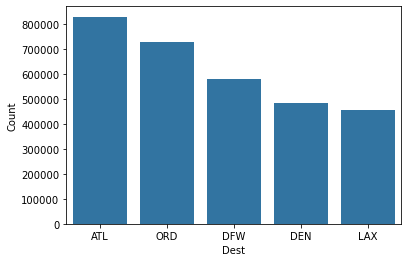

In [29]:
# Top 5 Origin airport code 
Counts_Dest= most_5_dest['Dest'].value_counts()
freq_Dest= Counts_Dest.index
sb.countplot( data= most_5_dest, x= 'Dest', color=base_color, order= freq_Dest)

plt.ylabel('Count')
plt.xlabel('Dest')

the highest 5 airports that recives flights are same as the origin airports.

Text(0.5, 0, 'Arrival Delays in minutes')

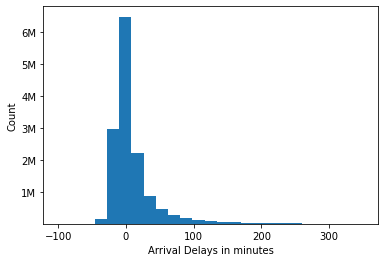

In [30]:
# seeing the Arrdelay minutes in histogram chart.
plt.hist(data= df , x= 'ArrDelay', range=[-100,350], bins=25);
plt.yticks([1e6, 2e6, 3e6, 4e6, 5e6, 6e6], [  '1M', '2M','3M','4M','5M','6M'])
plt.ylabel('Count')
plt.xlabel('Arrival Delays in minutes')

<ipython-input-31-2a25431d4f44>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,10000]);


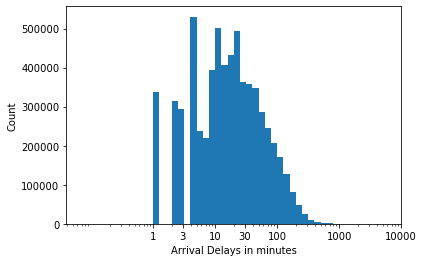

In [31]:
# seeing the Arrdelay minutes in histogram chart.
bins = 10 ** np.arange(-1, 7+0.1, 0.1)
ticks= [1, 3,10, 30, 100,1000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data= df , x= 'ArrDelay', bins=bins);
#plt.yticks([0.5e6, 1.0e6, 1.5e6, 2.0e6, 2.5e6,3.0e6], [ '500k', '1M', '1.5M', '2M', '2.5M','3M'])
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Arrival Delays in minutes')
plt.xlim([0,10000]);
plt.xticks(ticks, labels);

As arrival delay minutes take a long one side tailed distribution, where many data are in the positive side of minutes which mean more flights arrived late that it should be than arrive early, that lead to use log transformation. that indicate that majorty of data are late by around 30 minutes. In addition, the number of flights that arrive less than 10 minutes are getting lower but aafter 10 mintues of delay the number of flights each a peak and getting down again after 30 minutes.

<ipython-input-32-d7635637ca67>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,10000]);


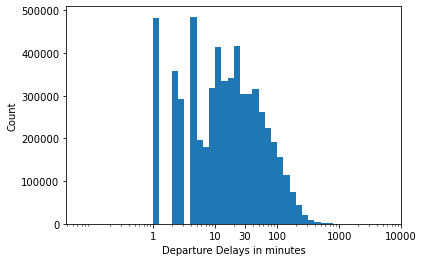

In [32]:
# seeing the  depdelay minutes in histogram chart.
bins = 10 ** np.arange(-1, 7+0.1, 0.1)
ticks= [1, 10, 30, 100, 1000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data= df , x= 'DepDelay', range=[-100,350], bins=bins);
#plt.yticks([1e6, 2e6, 3e6, 4e6, 5e6], [ '1M', '2M', '3M', '4M', '5M'])
plt.xscale('log');
plt.ylabel('Count')
plt.xlabel('Departure Delays in minutes')
plt.xticks(ticks, labels);
plt.xlim([0,10000]);


The Departures Delays seems that is correlated to Arrival delay. so we can see that they are quit similler to each other.

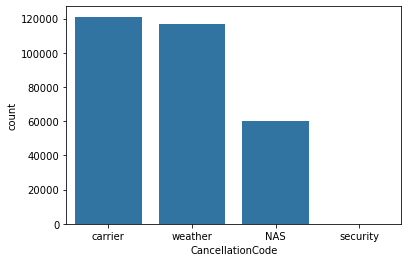

In [33]:
#see the frequance of each cause of cancellation
order_cancel=df['CancellationCode'].value_counts().index
sb.countplot(data=df, x='CancellationCode', color=base_color);

Carrier and Weather are the highest reason of delay followed by the National Airspace System (NAS) which contian non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. note: taking into considiration that more than 14 million rows are taking NA values. so that not represent all values.

<ipython-input-40-794de0988e51>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,10000]);


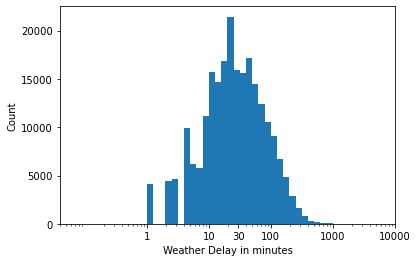

In [40]:
# seeing the Weather Delay minutes  in histogram chart.
bins = 10 ** np.arange(-1, 7+0.1, 0.1)
ticks= [1, 10, 100,30, 1000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data= df , x= 'WeatherDelay', range=[-50,100], bins=bins);
#plt.yticks([0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6, 1.2e6, 1.4e6], [ '200k', '400k', '600K', '800K', '1M','1.2M','1.4M']);
plt.ylabel('Count')
plt.xlabel('Weather Delay in minutes')
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim([0,10000]);

We can see that weather delys shape takes a bill shape in term of data distribuation after taking log tranformation. the 20 minutes are the peak of the data with the hights number of flights.

<ipython-input-41-98c14f5f7189>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,10000]);


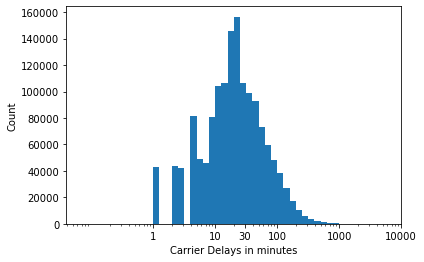

In [41]:
# seeing the carrier delay minutes in histogram chart.
bins = 10 ** np.arange(-1, 7+0.1, 0.1)
ticks= [1, 10, 100,30, 1000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data= df , x= 'CarrierDelay', range=[-100,300], bins=bins);
#plt.yticks([0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6], [ '200k', '400k', '600K', '800K', '1M']);
plt.ylabel('Count')
plt.xlabel('Carrier Delays in minutes')
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim([0,10000]);

We can see that carrier delays are reaching more than the weather delay. but its followed the same shape of distribution.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Arrival delays , Deperture delays, Carrier Delay, Weather Delay are taking skweed shape that is due to that delays minutes are taking more place than arrivaing or deperturing early. So,  I looked te log of the data to tranform it to more understandabule way.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I create new columns that based on numerical variables which are ArrDelay_status and DepDelay_status. i did that to enhance the analysis and to understand the numbers more.



## Bivariate Exploration

Looking at the relationship and the corrlation of the variables.

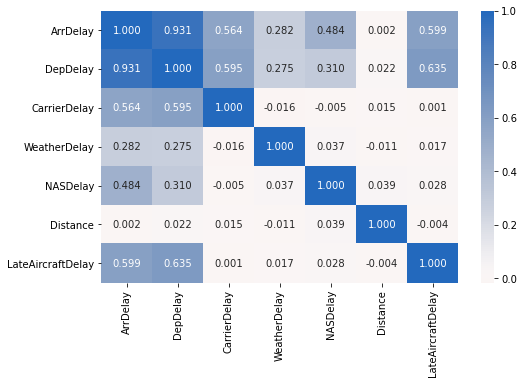

In [42]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap( df[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','Distance','LateAircraftDelay']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We can see there is a strong positive relationship between Arrival delay and Departure delay. in addition, there is some relationship between carrier delay and arrival delay. but that appears to be a correlation between Departure delay and carrier delay. Moreover, late aircraft delay which mean the late that came from the same aircraft from previous airport has relationship with late Arrival and departure delay.

Text(0, 0.5, 'Departure Delays in minutes')

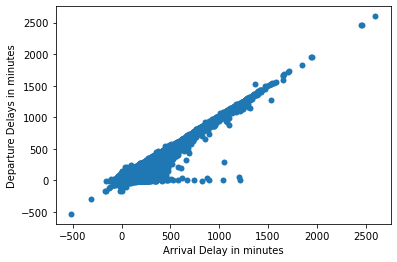

In [43]:
# scatter plot arrival abd departure delay.
plt.scatter(data=df, x='ArrDelay',y='DepDelay');
plt.xlabel('Arrival Delay in minutes')
plt.ylabel('Departure Delays in minutes')

We can see postive stronge relationship between arrival delay and departure delay.

Text(0, 0.5, 'Late Aircraft in minutes')

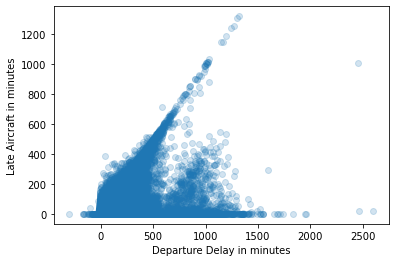

In [44]:
# scatter plot departure delay and late Aircraft delay.
sb.regplot(data=df, x='DepDelay',y='LateAircraftDelay', fit_reg= False, x_jitter= 0.3, scatter_kws={'alpha':1/5});
plt.xlabel('Departure Delay in minutes') 
plt.ylabel('Late Aircraft in minutes')

We can see that there is relationship between Departure delay and late Aircraft delay. 

(10.0, 80.0)

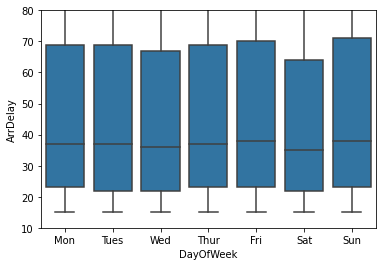

In [205]:
# see the Arrival delay minutes that above 15 minutes delay with the day of the week
delay_arr= df.query('ArrDelay >= 15')
ArrDel_V_DofW= sb.boxplot(data=delay_arr, x='DayOfWeek', y='ArrDelay', color= base_color);
plt.ylim([10,80]) 

Friday and Sunday have the highest median Arrival delay minutes amonge other days of the week and the Q3 which is 75% of data reach to around 38 minutes of delay . 

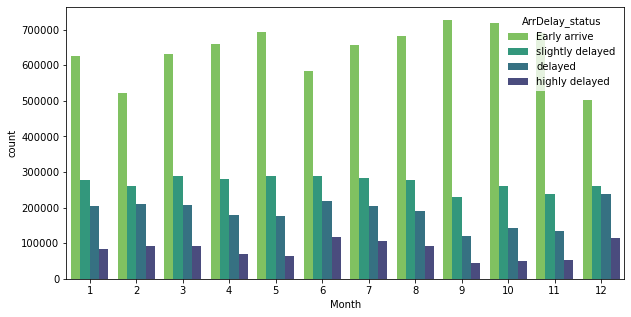

In [206]:
# months vs depdelay status 
plt.figure(figsize = [10, 5])
sb.countplot(data=df, hue='ArrDelay_status', x='Month',  palette='viridis_r');

December is seeming to be the highest in term of highest delays followed by June, that mean the flights arrival with delay exceed it an hour. otherwise, September is the lowest in term of delayed flights and highest in term of early arrive.

(10.0, 90.0)

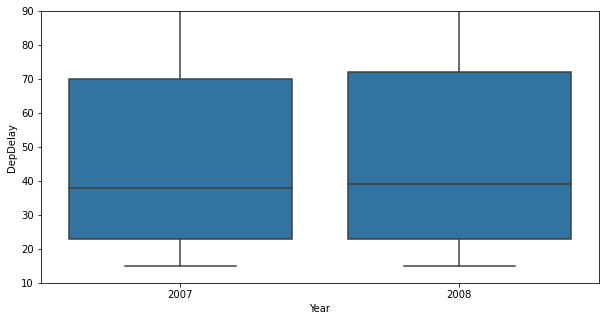

In [208]:
# year vs depdelay minutes above 15 minutes
plt.figure(figsize = [10, 5])
deplay_15= df.query('DepDelay >= 15')
sb.boxplot(data=deplay_15, x='Year',y='DepDelay', color= base_color);
plt.ylim([10,90]) 

we can see that they are quite similer but 2008 indicate slightly more range of delay minutes. the median of both are around 38 minutes.

(-5.0, 35.0)

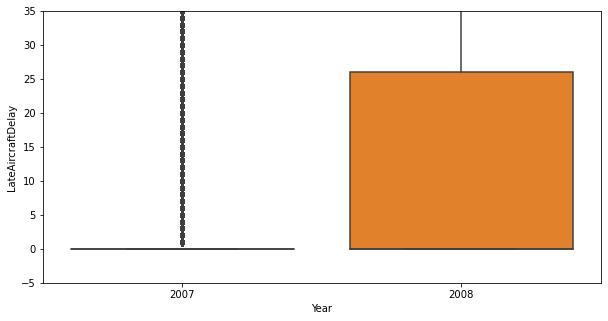

In [161]:
# Year vs LateAircraftDelay 
plt.figure(figsize = [10, 5])
sb.boxplot(data=df, x='Year',y='LateAircraftDelay');
plt.ylim([-5,35]) 

2008 reach to 27 minutes of delay due to e late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

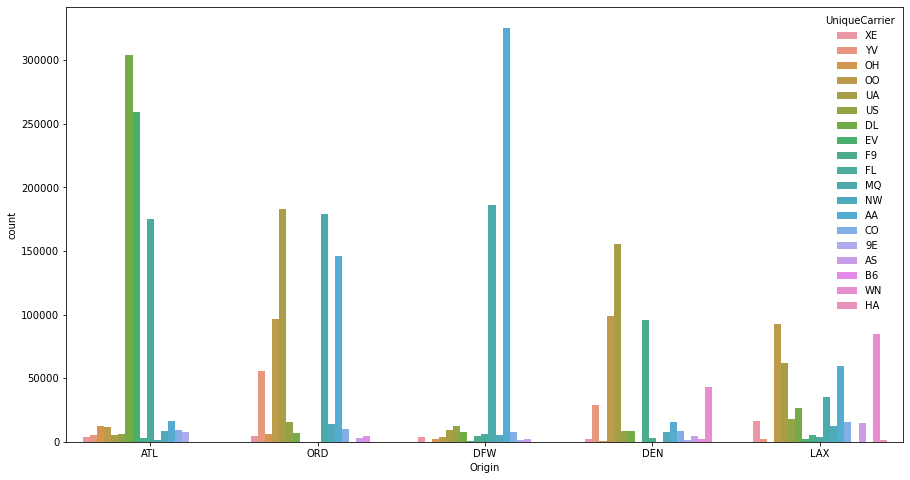

In [198]:
# Origin vs UniqueCarrier 
plt.figure(figsize = [15, 8])
sb.countplot(data=most_5_origin, hue='UniqueCarrier', x='Origin');

Each Airport seems to operate 2 or 3 Airlines more than others except LAX: Los Angeles International Airport that have a more diverse operators in it land. At the top 5 origin Airpots DL: Delta Airlines and EV: Atlantic Southeast Airlines are the highest in ATL:  Atlanta International Airport. AA: American Airlines and MQ:American Eagle Airlines are the highest in ORD:  Chicago International Airport.

(10.0, 100.0)

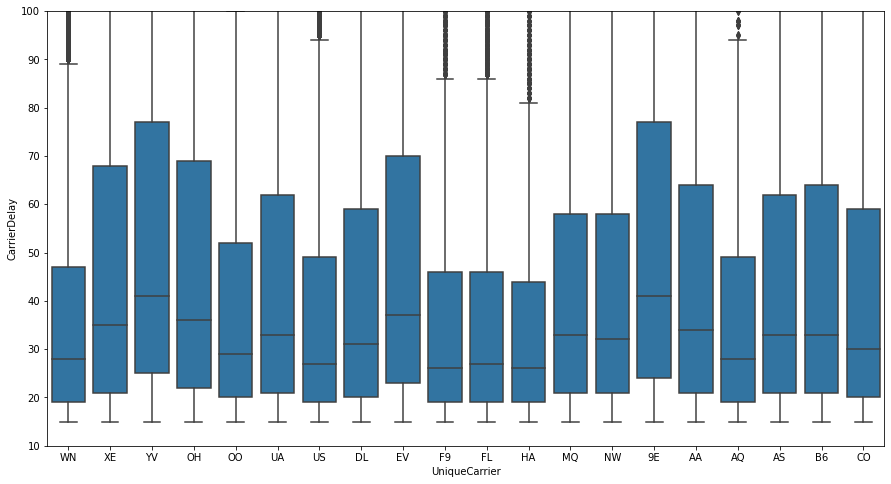

In [175]:
# which carrier operator has delay more than 15 miutes
Carr_dely_15= df.query('CarrierDelay >= 15')
plt.figure(figsize = [15, 8])
sb.boxplot(data=Carr_dely_15, x='UniqueCarrier', y='CarrierDelay',  color=base_color);
plt.ylim([10,100]) 

9E: Pinnacle Airlines having the highest range and median of carrier delay that exceed 15 minutes. It median reach above 40 minutes delay.

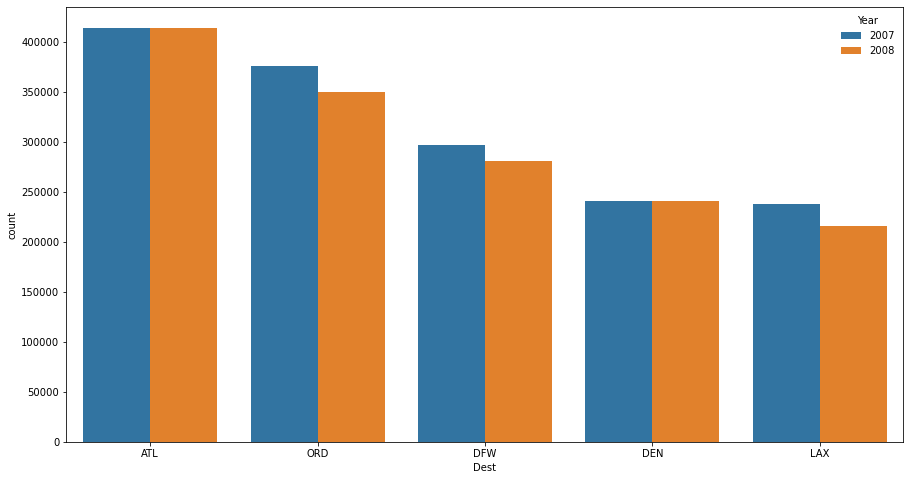

In [78]:
# Dest vs DayOfWeek 
plt.figure(figsize = [15, 8])
sb.countplot(data=most_5_dest, hue='Year', x='Dest');

Altough ATL: Atlanta International Airport and DEN: Denver International Airport are having the same amount of flights that land at their ground in the 2007 and 2008, the other highest destination airports have less flights in 2008 than 2007. 

(10.0, 150.0)

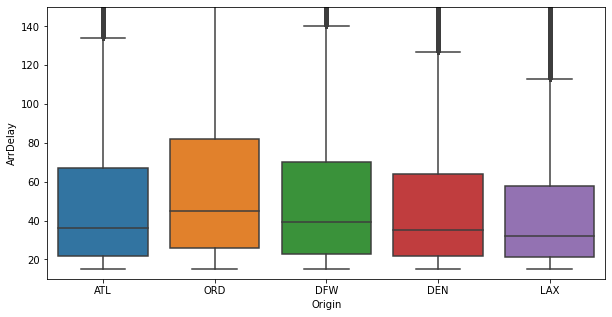

In [183]:
# which Airport that has the highest Arrival delay that exceed 15 minutes.
plt.figure(figsize = [10, 5])
a=most_5_origin.query('ArrDelay >= 15')
sb.boxplot(data=a, x='Origin',y='ArrDelay');
plt.ylim([10,150]) 

ORD: Chicago Airport has the highest Arrival delay minutes that exceed 15 minutes which range and median is around 50 minutes .

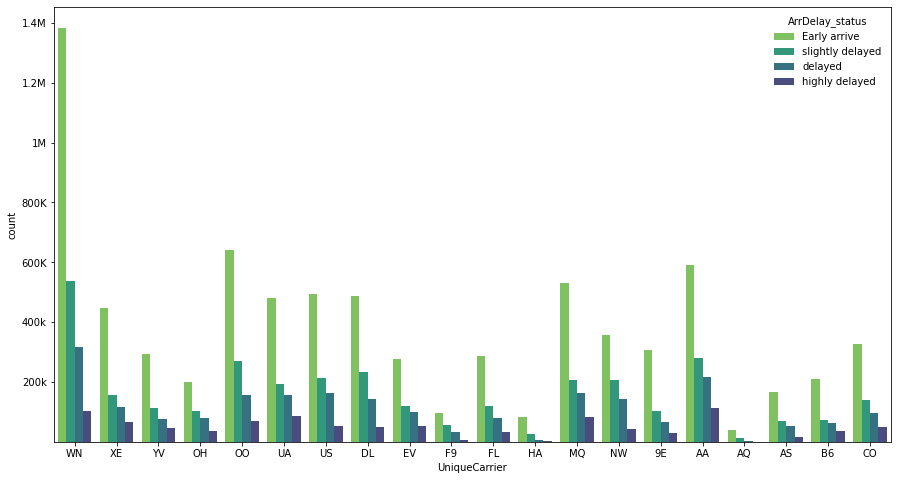

In [49]:
# months vs Arrdelay status 
#plt.figure(figsize = [10, 5])
plt.figure(figsize = [15, 8])
sb.countplot(data=df, hue='ArrDelay_status', x='UniqueCarrier',  palette='viridis_r');
plt.yticks([0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6,1.2e6,1.4e6], [ '200k', '400k', '600K', '800K', '1M','1.2M','1.4M']);


We can see that all carrier operators have more than 60 minutes. the highest in term of ealy arriving is WN: Southwest Airlines followed by  AA: American Airlines and OO: Skywest Airlines. for highe delay is better to see it alone.

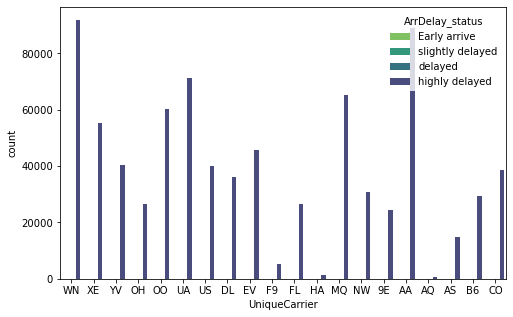

In [39]:
# highest delays Carrier where their arrival and departure statuse is highly delayed.
plt.figure(figsize = [8, 5])
high_dely= df.query('ArrDelay_status=="highly delayed" and DepDelay_status=="highly delayed"')
sb.countplot(data= high_dely, x='UniqueCarrier', hue='ArrDelay_status',  palette='viridis_r');

WN: Southwest Airlines followed by AA: American Airline and UA: US Airline are having the highest number of flights that exceed 60 minutes of delays. for the first 2 Airlines are having more 80,000 highly delayed in the past 2 years.

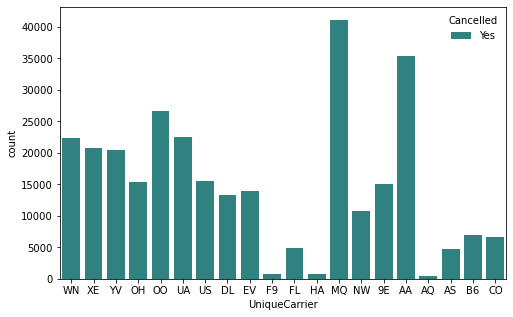

In [81]:
# highest cancelation flights based on Carrier operator.
plt.figure(figsize = [8, 5])
Can_Carr= df.query('Cancelled== "Yes"')
sb.countplot(data= Can_Carr, x='UniqueCarrier', hue='Cancelled',  palette='viridis_r');

MQ: American Eagle Airlines hasing more than 40,000 canceled flights over the 2 years followed by AA:American Airline.

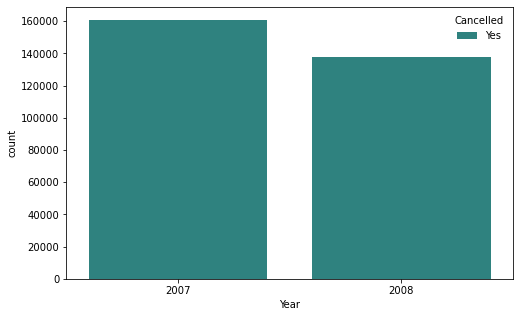

In [82]:
# highest cancelation flights based on Carrier operator.
plt.figure(figsize = [8, 5])
Can_year= df.query('Cancelled== "Yes"')
sb.countplot(data= Can_Carr, x='Year', hue='Cancelled',  palette='viridis_r');

2007 has more cancelled flights than 2008 by around 20,000 flights.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

we can see that 2008 showes some imporovemt in term of arrival and departeral delay minutes. In addtion, the number of cancelled flights decreased in 2008. there is stronge positive relationship between arrival time and departure time. Moreover, late Air craft that which cauesd by the late arrival of the same aircraft at a previous airport is way higher in 2008 than 2007 and it has a relationship with deperature delay and this is expected cause the delays comes from the previous flight. Furthermore, Some airlines operators has more cancelation and delay time more than others such as American Eagle Airlines, Southwest Airlines, and American Airline.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

no, all the relationship are amonge the main features.

## Multivariate Exploration

The main thing I want to do in this part of the analysis is explore thre dimantion relationship amonge Arrival delay , Departture delay and years.


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(10.0, 100.0)

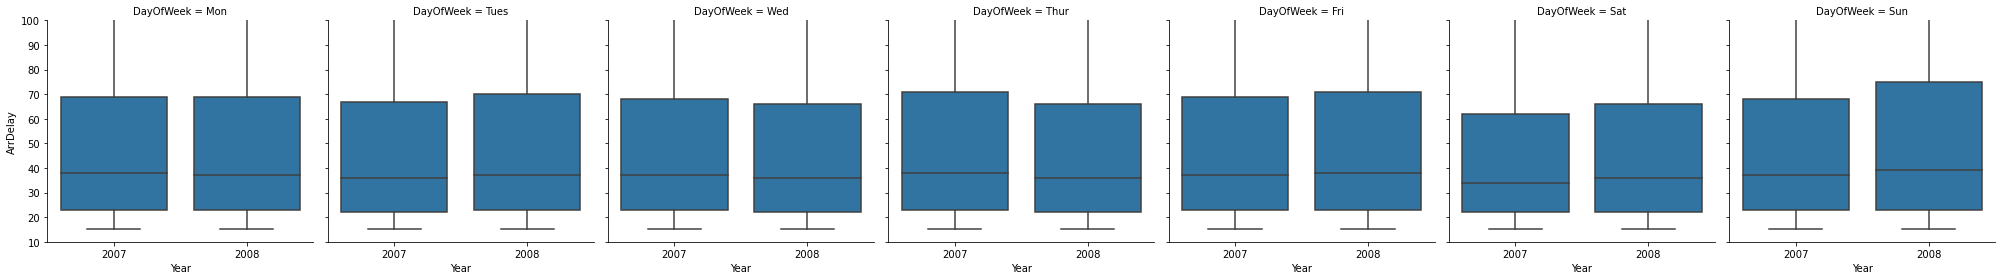

In [195]:
# As we care about the delayed flights only so i will select only the 
# plotting years, Day of the week and ArrDelay in minutes exceed 15 minutes od delay as Box plot with Facetgrid.
De_arr=df.query('ArrDelay >= 15')
g = sb.FacetGrid(data = De_arr, col = 'DayOfWeek', size = 4 )
g.map(sb.boxplot, 'Year', 'ArrDelay')
plt.ylim([10,100]) 

the 2 years are quite similar in term of Arrival delay that more than 15 minutes with so slight difference based on each day of the week. that delay is around 38 minutes in average.

Text(0.5, 1.0, 'years, UniqueCarrier and CarrierDelay in minutes')

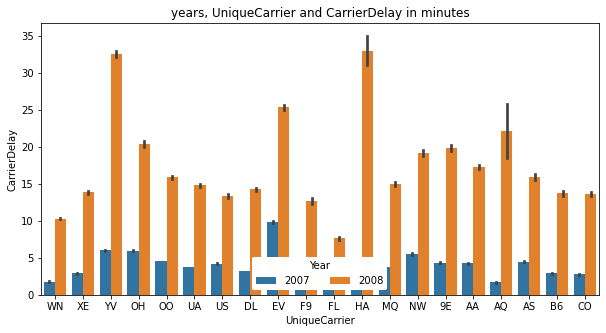

In [40]:
# plotting years, UniqueCarrier and WeatherDelay in minutes as Box plot with Facetgrid.
plt.figure(figsize = [10, 5])
ax = sb.barplot(data = df, x = 'UniqueCarrier', y = 'CarrierDelay', hue = 'Year');
ax.legend(loc = 8, ncol = 2, framealpha = 2, title = 'Year')
plt.title('years, UniqueCarrier and CarrierDelay in minutes')

In 2008 the Carrier Delay minutes reach more than 2007. That indicate that delay within the control of the air carrier. In addition, we can see that HA: Hawaiian Airlines that has the highest minutes of delay within their control reach to 33 minutes followed by YV: Mesa Airlines and then EV: Atlantic Southeast Airlines.

C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(-15.0, 50.0)

<Figure size 1080x504 with 0 Axes>

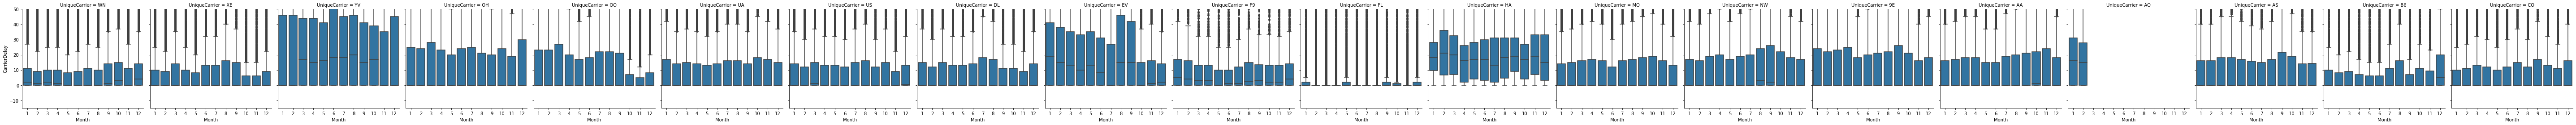

In [47]:
# As we see 2008 has more carrier delay we want to see in wich month has the highest.
# plotting Day of the Week, Origin and Late Aircraft Delay in minutes as Clustered bar chart.
plt.figure(figsize = [15, 7])
dely_2008= df.query('Year == 2008')
s = sb.FacetGrid(data = dely_2008, col = 'UniqueCarrier', size = 4 )
s.map(sb.boxplot, 'Month', 'CarrierDelay')
plt.ylim([-15,50]) 

So to know which month has the highest carrier delay based on 2008 has the highest carrier delay. As we see Hawaiian Airlines has the highest delay in 2008 specially at Feb, March, Sep, and Nov. in addition, the months has lower range but higher median compered to YV: Mesa Airlines that has high range at all months. August is the highest month of carrier delay caused by YV: Mesa Airlines. Jan, Aug, and Sep are the highest in EV:Atlantic Southeast Airlines. AQ: Aloha Airlines has delays only in Jan and Feb but with high median.

Text(0.5, 1.0, 'Day of the Week, Origin and Late Aircraft Delay in minutes')

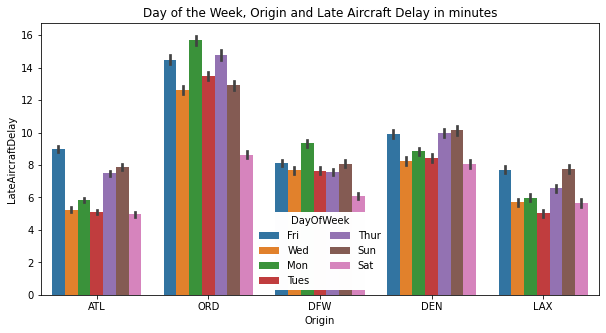

In [50]:
# plotting Day of the Week, Origin and Late Aircraft Delay in minutes as Clustered bar chart.
plt.figure(figsize = [10, 5])
ax = sb.barplot(data = most_5_origin, hue = 'DayOfWeek', y = 'LateAircraftDelay', x = 'Origin')
ax.legend(loc = 8, ncol = 2, framealpha = 2, title = 'DayOfWeek')
plt.title('Day of the Week, Origin and Late Aircraft Delay in minutes')

the day of week has vary late Aircraft delay minutes over the origin airport. Monday at ORD: Chicago O'Hare International Airport has the highest delays due to the late arrival of the same aircraft at a previous airport. we can see that saturday has the lowest delay that caused of the lowest number of flights that happen in that day while Monday, Friday and Thuresday are the highest. Although ATL: Atlanta International Airport has the highest number of flights but the delays that comes from airports are happend more in Chicago Airport over all other airports.

Text(0.5, 1.0, 'Day of the Week, Origin and Late Aircraft Delay in minutes')

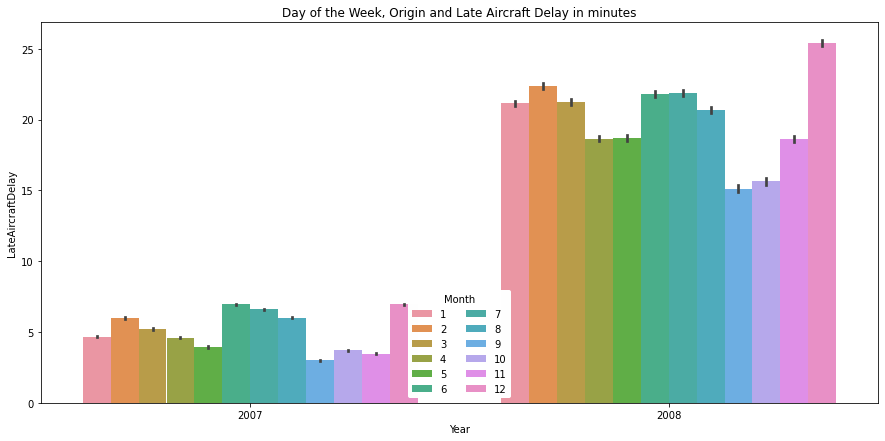

In [49]:
# plotting Month, Year and Late Aircraft Delay in minutes as Clustered bar chart.
plt.figure(figsize = [15, 7])
ax = sb.barplot(data = df, hue = 'Month', y = 'LateAircraftDelay', x = 'Year')
ax.legend(loc = 8, ncol = 2, framealpha = 2, title = 'Month')
plt.title('Day of the Week, Origin and Late Aircraft Delay in minutes')

2008 has more delay that came from The ripple effect of an earlier delay at downstream airports is referred to as delay propagation. that can be showen more at December with more than 25 minuts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I can see that in the Mutlivariate exporation i get so siginificant results. i found out the 2008 has more delay minutes caused by Carrier operators and the late arrival of the same aircraft at a previous airport than 2007. Moreover, that delay can be known by which carrier or Airport origin and in which month. but when we look at the Arrival delay that we can call it delay which exceed 15 minutes the 2 years showed the same average of time delay around 38 minutes in average. 

### Were there any interesting or surprising interactions between features?

Almost all the relationship and interaction are expected.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!